##**Task 1 :- Prediction Using Supervised ML**

###**Author :- Harsh Bhatia**

Task: To predict the percentage of a student based on the number of study hours.

To predict the score if a student studies for 9.25 hrs/ day? 

Implementing the task using the Scikit Learn library in python.
This is a simple linear regression problem as there are two variables:- 
Number of study hours(input) and Marks Scored(%)(output to be predicted)

Link to the dataset:- http://bit.ly/w-data




In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#read data from link 
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("Entries of the data")
data.head()

Entries of the data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.shape

(25, 2)

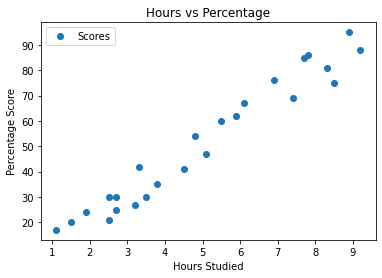

In [ ]:
#Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show() 

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

###**Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [ ]:
X = data.iloc[:,0:1].values  #1st column of data is X
Y = data.iloc[:,1].values  #2nd column of data is Y


Now that we have our attributes and labels, the next step is to split this data into training and test sets.

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


###**Training the Algorithm**

In [ ]:
#importing the LinearRegression and instantiating it
from sklearn.linear_model import LinearRegression  
regressor=LinearRegression()

#calling fit method which finds the best value for intercept and slope for best fit line
regressor.fit(X_train, Y_train) 
print("Training is complete")

Training is complete


slope= 9.91065648064224
intercept= 2.018160041434662


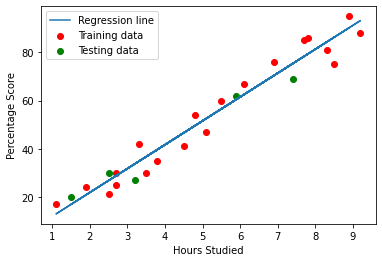

In [ ]:

print("slope=",regressor.coef_[0])
print("intercept=",regressor.intercept_)

# Plotting the linear regression line in the format y=mx+b 
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X_train, Y_train,color="red",label="Training data")
plt.scatter(X_test,Y_test,color="green",label="Testing data")
plt.plot(X, line, label="Regression line");
plt.legend(loc="upper left")
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()


###**Making Predictions**


In [ ]:
print("Testing data")
print(X_test)

Testing data
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
#predicitng the scores for the test data
Y_pred = regressor.predict(X_test)

#comparing the predicitng scores with actual scores
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
print(df)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


###**Evaluating the model**

Evaluate the performance of the model by calculating the Residual Standard Error($R^2$)

In [ ]:
#The best possible value of R2 is 1.0 and it can be negative (because the model can be arbitrarily worse).
#A constant model that always predicts the expected value of y, disregarding the input features, would get a R2 score of 0.0.

from sklearn import metrics  
print("Residual standard error (R^2=1- SSE/SST) =",regressor.score(X_test,Y_test))

Residual standard error (R^2=1- SSE/SST) = 0.9454906892105354


###**Since the $R^2$ values is near to 1 so the model is very efficient**

In [ ]:
#prediciting the answer to score of student studying 9.25hrs/day
hours=[[9.25]]
sol=regressor.predict(hours)

print("Score on studying 9.25 hrs/day is ",sol[0],"%")

Score on studying 9.25 hrs/day is  93.69173248737539 %
